<a href="https://colab.research.google.com/github/fulasho/Predictive-Analytics/blob/main/911_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let Import Libraries that going to be needed for this analysis

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
 df = pd.read_csv('/content/drive/MyDrive/911.csv')

In [61]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [63]:
df.duplicated().sum()

0

Let Drop the 'e' column as its not necessary for this analysis

In [64]:
df.drop('e',axis=1,inplace=True)

In [65]:
df.describe()

,lat,lng,zip
count,99492.000000,99492.000000,86637.000000
mean,40.159526,-75.317464,19237.658298
std,0.094446,0.174826,345.344914
min,30.333596,-95.595595,17752.000000
25%,40.100423,-75.392104,19038.000000
50%,40.145223,-75.304667,19401.000000
75%,40.229008,-75.212513,19446.000000
max,41.167156,-74.995041,77316.000000


The 5 highest zip codes that receive the emergency call

In [66]:
zip_counts=df['zip'].value_counts()
zip_counts.iloc[:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

The 5 highest towships

In [67]:
twp_counts=df['twp'].value_counts()
twp_counts.iloc[:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Let split the title and create a new Column called Reasons/Departments

In [68]:
df['title'].nunique()

110

In [69]:
df['Reasons/Departments']=""

In [70]:
df['Reasons/Department']=df['title'].apply(lambda k : k.split(':')[0] )
df.drop('Reasons/Departments',axis=1,inplace=True)
df['Reasons/Department'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reasons/Department, dtype: int64

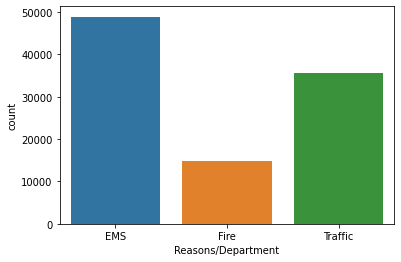

In [71]:
sns.countplot(x='Reasons/Department',data=df)

In [72]:
import datetime
from pandas._libs.tslibs import timestamps
#For better analysis timestamps need to be convert into datetime

In [73]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [74]:
time=df['timeStamp'].iloc[0]
time.dayofweek

3

In [75]:
df['Hour']=df['timeStamp'].apply(lambda time: time.hour)
df['Month']=df['timeStamp'].apply(lambda time: time.month)
df['DayOfWeek']=df['timeStamp'].apply(lambda time: time.dayofweek)
dmap={0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DayofWeek']=df['DayOfWeek'].map(dmap)

Now that we converted the timestamps and create a new column let pull out the new dataset

In [76]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons/Department,Hour,Month,DayOfWeek,DayofWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,EMS,17,12,3,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,17,12,3,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,Fire,17,12,3,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,EMS,17,12,3,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,17,12,3,Thu


Let visualize the calls by day of the week

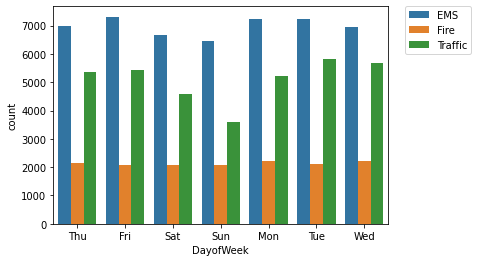

In [77]:
sns.countplot(x='DayofWeek',data=df,hue='Reasons/Department')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Let visualize the calls by Month

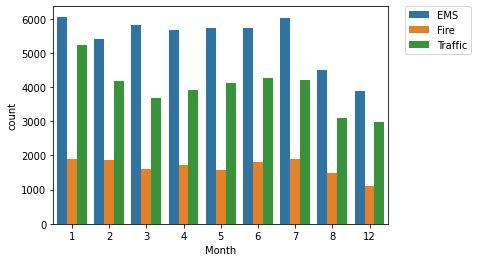

In [78]:
sns.countplot(x='Month',data=df,hue='Reasons/Department')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

Let visualize the calls by Hour

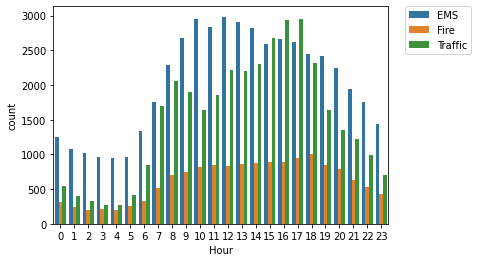

In [79]:
sns.countplot(x='Hour',data=df,hue='Reasons/Department')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)

In [80]:
byMonth=df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,Reasons/Department,Hour,DayOfWeek,DayofWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


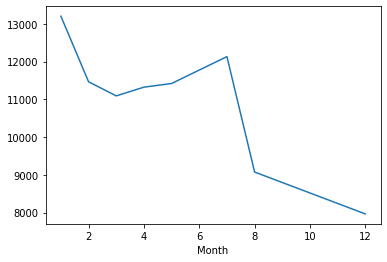

In [81]:
byMonth['twp'].plot()

The above graph shows that the emergency calls dropped from month 1 before a slight increase till month 8 then a dramactic decline to the end of year.

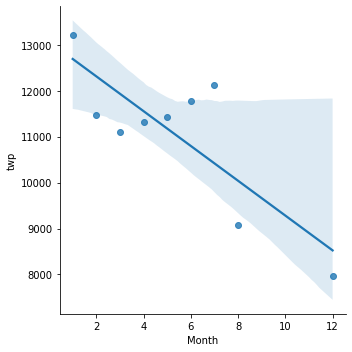

In [82]:
sns.lmplot(x='Month',y='twp',data=byMonth.reset_index())